# The Regression Models


# # Linear Regression Model
1. Linear Regression Model:
This simple linear regression calculator uses the least squares method to find the line of best fit for a set of paired data, allowing you to estimate the value of a dependent variable (Y) from a given independent variable (X).

The values of Y are dependent on the values of all the other attributes.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
new_data_dummies = pd.read_csv('preprocessed_data.csv')                                #Reading the data into a object named "data"

#Preparing data for the Model 
columns1 = new_data_dummies.columns
X_Linear =  new_data_dummies.loc[:, new_data_dummies.columns != 'Price']
y_Linear = new_data_dummies.iloc[:, 6].values

#Splitting the data as Training and Testing parts we take 20% for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X_Linear, y_Linear, test_size = 0.2, random_state = 0)

#Building a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)                     #Matrix of feature X_train and Predictor y_train

print('')
#Predicting for Testing Data
y_pred_Linear = regressor.predict(X_test)  

print('')
#Displaying the Predicted  Values
array1 = np.concatenate((y_pred_Linear.reshape(len(y_pred_Linear),1), (y_test.reshape(len(y_test),1) )),1)
display(array1)
df_Linear = pd.DataFrame(array1,columns=['Predicted_Value','Original_Value'])
display(df_Linear.head(15))
print('')


print('')
print('Final Numbers from the Data')
print('Observations from Linear Regression')
print('')
print('Y intercept is :',regressor.intercept_)
# print('Coeffiecient is :', regressor.coef_)-6/
zipped_coeff = zip(columns1,regressor.coef_)
print(zipped_coeff)                                 #This will zip all the attributes with its respective Coeffiecents

print('')
print('Score is',round(regressor.score(X_test,y_test),2))
r2_score_error = r2_score(df_Linear['Predicted_Value'],df_Linear['Original_Value'])
print('Mean absolute error %:',metrics.mean_absolute_error(df_Linear['Predicted_Value'],df_Linear['Original_Value']))
print('Root mean quare error ',round(r2_score_error,2),'%')
accuracy = round(regressor.score(X_test,y_test),2)
print('Accuracy of the model ',accuracy)
print('Accuarcy % of the model ',accuracy*100,'%')
print('Explained Varience Score',round(metrics.explained_variance_score(y_test, y_pred_Linear),4))                                                             

array([[7.404982  , 7.25      ],
       [2.78170277, 4.25      ],
       [4.03914151, 3.9       ],
       ...,
       [9.54365597, 8.5       ],
       [5.31468722, 6.25      ],
       [4.65443784, 3.87      ]])

,Predicted_Value,Original_Value
0,7.404982,7.25
1,2.781703,4.25
2,4.039142,3.90
3,11.577341,8.41
4,13.936518,13.48
5,5.335121,4.25
6,5.386242,5.35
7,-1.169809,1.67
8,5.416171,3.75
9,4.670504,3.25




Final Numbers from the Data
Observations from Linear Regression

Y intercept is : -1136.0216672454076

Score is 0.9
Mean absolute error %: 1.3845973940773921
Root mean quare error  0.88 %
Accuracy of the model  0.9
Accuarcy % of the model  90.0 %
Explained Varience Score 0.8991


# Random Forest Regressor

array([[7.7994, 7.25  ],
       [3.2009, 4.25  ],
       [4.1958, 3.9   ],
       ...,
       [8.3823, 8.5   ],
       [5.8904, 6.25  ],
       [3.577 , 3.87  ]])

,Predicted_Value_Forest,Original_Value_Forest
0,7.7994,7.25
1,3.2009,4.25
2,4.1958,3.90
3,12.2620,8.41
4,13.9690,13.48
5,4.8556,4.25
6,5.8368,5.35
7,1.4450,1.67
8,4.4530,3.75
9,3.8743,3.25


Score is 0.948
0.948
Accuarcy Percentage is : 94.8 %
Mean absolute error %: 1.3845973940773921
Root mean quare error  0.88 %
Accuracy of the model  0.9


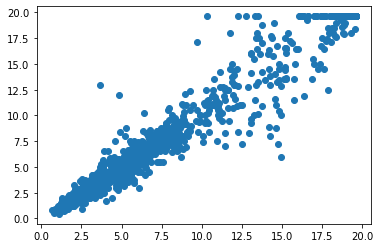

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#Preparing data for the Model 
X_Forest =  new_data_dummies.loc[:, new_data_dummies.columns != 'Price']
y_Forest = new_data_dummies.iloc[:, 6].values

#Splitting the data as Training and Testing parts we take 20% for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X_Forest, y_Forest, test_size = 0.2, random_state = 0)

print('')
#Building a Linear Regression model
regressor_Forest = RandomForestRegressor()
regressor_Forest.fit(X_train, y_train)                     #Matrix of feature X_train and Predictor y_train

print('')
#Predicting for Testing Data
Predicted_Value_Forest = regressor_Forest.predict(X_test)  

print('')
#Displaying the Predicted  Values
array1 = np.concatenate((Predicted_Value_Forest.reshape(len(Predicted_Value_Forest),1), (y_test.reshape(len(y_test),1) )),1)
display(array1)
df_RnForest = pd.DataFrame(array1,columns=['Predicted_Value_Forest','Original_Value_Forest'])
display(df_RnForest.head(15))
print('Score is',round(regressor_Forest.score(X_test,y_test),4))

accuracy = round(regressor_Forest.score(X_test,y_test),4)
print(accuracy)
print('Accuarcy Percentage is :',accuracy*100,'%')

round(metrics.explained_variance_score(y_test, Predicted_Value_Forest),4)
plt.scatter(df_RnForest['Predicted_Value_Forest'],df_RnForest['Original_Value_Forest'])
r2_score_error = r2_score(df_Linear['Predicted_Value'],df_Linear['Original_Value'])
print('Mean absolute error %:',metrics.mean_absolute_error(df_Linear['Predicted_Value'],df_Linear['Original_Value']))
print('Root mean quare error ',round(r2_score_error,2),'%')
accuracy = round(regressor.score(X_test,y_test),2)
print('Accuracy of the model ',accuracy)

# KNN Regression Model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')
[10.87333333  3.3         4.76666667 ...  4.88333333  8.74
  3.31      ]


,Predicted_Value_regressor_KNN,Original_Value_regressor_KNN
0,10.873333,7.25
1,3.300000,4.25
2,4.766667,3.90
3,17.246667,8.41
4,15.600000,13.48
5,4.450000,4.25
6,6.963333,5.35
7,3.900000,1.67
8,3.673333,3.75
9,4.813333,3.25


Score is 0.6381
Accuracy % is  63.81 %
Mean absolute error %: 1.3845973940773921
Root mean quare error  0.88 %


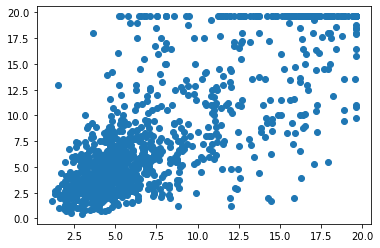

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

X_KNN = new_data_dummies.loc[:, new_data_dummies.columns != 'Price']
y_KNN = new_data_dummies.iloc[:, 6].values

X_train, X_test, y_train, y_test = train_test_split(X_KNN, y_KNN, test_size = 0.2, random_state = 0)

regressor_KNN = KNeighborsRegressor(n_neighbors = 3)
regressor_KNN.fit(X_train, y_train)                     #Matrix of feature X_train and Predictor y_train
print(regressor_KNN)


y_pred = regressor_KNN.predict(X_test)  
print(y_pred)
array1_regressor_KNN = np.concatenate((y_pred.reshape(len(y_pred),1), (y_test.reshape(len(y_test),1) )),1)
df = pd.DataFrame(array1_regressor_KNN,columns=['Predicted_Value_regressor_KNN','Original_Value_regressor_KNN'])
display(df.head(15))
plt.scatter(df['Predicted_Value_regressor_KNN'],df['Original_Value_regressor_KNN'])


print('Score is',round(regressor_KNN.score(X_test,y_test),4))
accuracy = round(regressor_KNN.score(X_test,y_test),4)
print('Accuracy % is ',accuracy*100,'%')
r2_score_error = r2_score(df_Linear['Predicted_Value'],df_Linear['Original_Value'])
print('Mean absolute error %:',metrics.mean_absolute_error(df_Linear['Predicted_Value'],df_Linear['Original_Value']))
print('Root mean quare error ',round(r2_score_error,2),'%')
accuracy = round(regressor.score(X_test,y_test),2)

# Support Vector Machine

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
[5.64528077 4.40441826 5.09786444 ... 6.3311246  5.54242804 5.4026631 ]


,Predicted_Value_regressor_KNN,Original_Value_regressor_KNN
0,10.873333,7.25
1,3.300000,4.25
2,4.766667,3.90
3,17.246667,8.41
4,15.600000,13.48
5,4.450000,4.25
6,6.963333,5.35
7,3.900000,1.67
8,3.673333,3.75
9,4.813333,3.25


Score is -0.0326
Accuracy % is  -3.26 %
Mean absolute error %: 1.3845973940773921
Root mean quare error  0.88 %


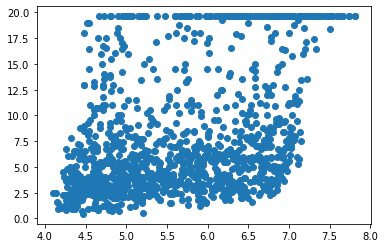

In [8]:
from sklearn.svm import SVR

X_SVM = new_data_dummies.loc[:, new_data_dummies.columns != 'Price']
y_SVM = new_data_dummies.iloc[:, 6].values

X_train, X_test, y_train, y_test = train_test_split(X_SVM, y_SVM, test_size = 0.2, random_state = 0)

regressor_SVM = SVR(C=1.0, epsilon=0.2)
regressor_SVM.fit(X_train, y_train)                     #Matrix of feature X_train and Predictor y_train
print(regressor_SVM)

y_pred = regressor_SVM.predict(X_test)  
print(y_pred)
array1_regressor_SVM = np.concatenate((y_pred.reshape(len(y_pred),1), (y_test.reshape(len(y_test),1) )),1)
array1_regressor_SVM_df = pd.DataFrame(array1_regressor_SVM,columns=['Predicted_Value_regressor_KNN','Original_Value_regressor_KNN'])
display(df.head(15))
plt.scatter(array1_regressor_SVM_df['Predicted_Value_regressor_KNN'],array1_regressor_SVM_df['Original_Value_regressor_KNN'])

print('Score is',round(regressor_SVM.score(X_test,y_test),4))
accuracy = round(regressor_SVM.score(X_test,y_test),4)
print('Accuracy % is ',accuracy*100,'%')
r2_score_error = r2_score(df_Linear['Predicted_Value'],df_Linear['Original_Value'])
print('Mean absolute error %:',metrics.mean_absolute_error(df_Linear['Predicted_Value'],df_Linear['Original_Value']))
print('Root mean quare error ',round(r2_score_error,2),'%')
accuracy = round(regressor.score(X_test,y_test),2)